In [1]:
import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def load_reviews_dataset(dataset: str):
    """
    Load the reviews dataset from the datasets library. 
    and save in a csv file in data folder
    
    Args:
        dataset: dataset to be loaded
    
    Returns:
        reviews: B2W reviews dataset from huggingface datasets library
    """
    # load the dataset
    reviews = datasets.load_dataset(dataset)
    return reviews['train'].to_csv('../data/01_raw/reviews.csv', index=False)

In [3]:
#DATASET = 'ruanchaves/b2w-reviews01'
#reviews = load_reviews_dataset(DATASET)

In [4]:
df = pd.read_csv('../data/01_raw/reviews.csv')

/tmp/ipykernel_7364/4081601290.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/01_raw/reviews.csv')


In [5]:
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [6]:
# Print the quantity of unique values in each column
df.nunique()

submission_date          129927
reviewer_id              112993
product_id                55930
product_name              47363
product_brand              1062
site_category_lv1            54
site_category_lv2           713
review_title              56555
overall_rating                5
recommend_to_a_friend         2
review_text              126724
reviewer_birth_year         115
reviewer_gender               2
reviewer_state               27
dtype: int64

In [7]:
# Print the quantity of null values in each column
df.isnull().sum()

submission_date              0
reviewer_id                  0
product_id                   0
product_name                84
product_brand            91391
site_category_lv1            6
site_category_lv2         4013
review_title               302
overall_rating               0
recommend_to_a_friend       18
review_text               3275
reviewer_birth_year       5984
reviewer_gender           4136
reviewer_state            3991
dtype: int64

In [8]:
# Create a function to drop all the rows with products have no names
def drop_null_products(dataframe: pd.DataFrame, column: str):
    """
    Drop all the rows with products have no names
    
    Args:
        dataframe: dataframe to be cleaned
    
    Returns:
        dataframe: cleaned dataframe
    """
    dataframe = dataframe.dropna(subset=[column])
    return dataframe

In [9]:
# Drop all the rows with products have no names and all reviews with no text
df = drop_null_products(df, 'product_name')
df = drop_null_products(df, 'review_text')

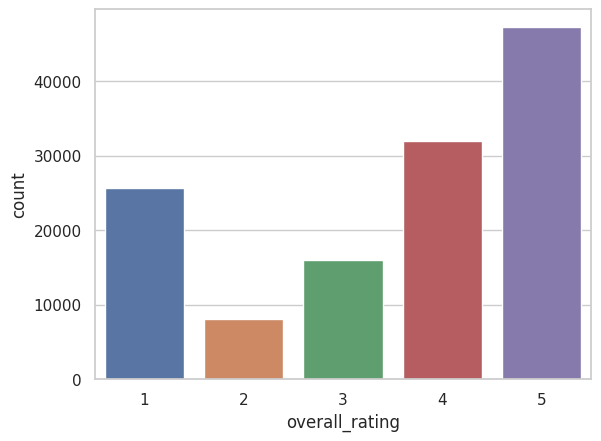

In [10]:
# Plot a barplot to see the distribution of the quantity of overall ratings
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="overall_rating", data=df)
plt.show()

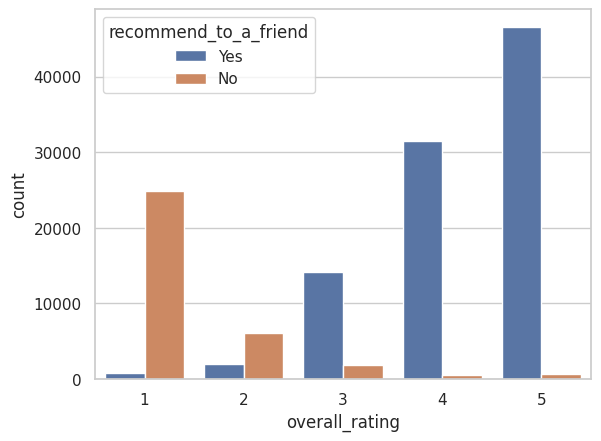

In [11]:
# Plot a relative stacked barplot to see the distribution of the quantity of overall ratings by recommendation
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="overall_rating", hue="recommend_to_a_friend", data=df)
plt.show()

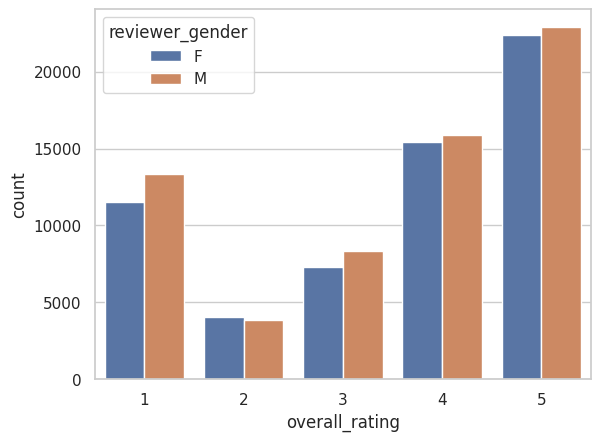

In [12]:
# Plot a relative stacked barplot to see the distribution of the quantity of overall ratings by reviewer gender
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="overall_rating", hue="reviewer_gender", data=df)
plt.show()

In [14]:
df['reviewer_birth_year'].describe()

count    123249.000000
mean       1977.536840
std          22.067873
min          59.000000
25%        1969.000000
50%        1980.000000
75%        1987.000000
max        2018.000000
Name: reviewer_birth_year, dtype: float64

In [17]:
# fix values in the column reviewer_birth_year
# if the value is less than 100, sum 1900 to the value
df['reviewer_birth_year'] = df['reviewer_birth_year'].apply(lambda x: x if x > 100 else x + 1900)

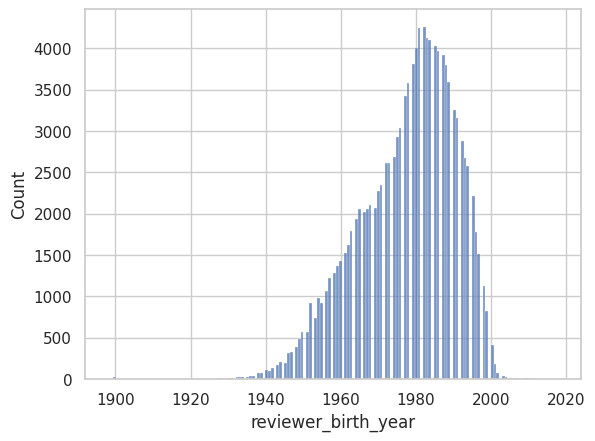

In [18]:
# plot the reviewer_birth_year distribution
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="reviewer_birth_year", data=df)
plt.show()

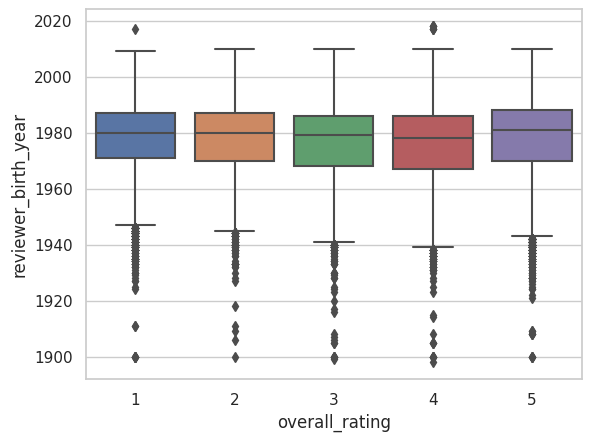

In [21]:
# plot the boxplot of the reviewer_birth_year distribution by overall_rating
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="overall_rating", y="reviewer_birth_year", data=df)
plt.show()

In [ ]:
# create a flag to identify all product that have 1 unique review plot a barplot
df['qt_review'] = df.groupby('product_name')['review_text'].transform('nunique')

In [ ]:
df['unique_review'] = df['qt_review'].apply(lambda x: 'unique review' if x == 1 else 'more than 1 review')
df['unique_review'].value_counts().plot(kind='bar')

In [ ]:
def split_data(dataframe: pd.DataFrame, test_size: float):
    """
    Split data into train and test sets
    
    Args:
        df: dataframe to be split
        test_size: size of the test set
    
    Returns:
        train: train set
        test: test set
    """
    train, test = train_test_split(df, test_size=test_size, random_state=42)
    return train, test